In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')
sample=pd.read_excel('Sample_submission.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


train datset

In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


test dataset

In [5]:
train.shape,test.shape

((10683, 11), (2671, 10))

in train 10683 row and 11 colums
in test 2671 row 10 colums

# Data wrangling

In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there are two missing value in train dataset
Route and total stops

In [7]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [8]:
import seaborn as sns

C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

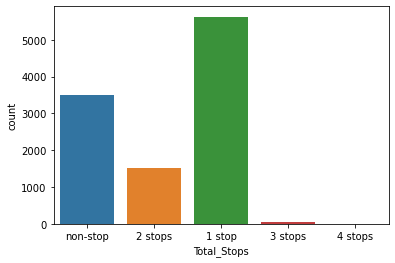

In [9]:
sns.countplot(train['Total_Stops'])

there 1 stop fligt more run as compare to other

In [10]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
42h 5m       1
29h 30m      1
40h 20m      1
37h 10m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
train.dropna(inplace=True)

In [12]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

no missing value now

In [13]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

no missing value in test

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


there are mosty object value

In [15]:
train["Day_of_Journey"]= pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.day
train["Month_of_Journey"]= pd.to_datetime(train.Date_of_Journey, format= "%d/%m/%Y").dt.month
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
test["Day_of_Journey"]= pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.day
test["Month_of_Journey"]= pd.to_datetime(test.Date_of_Journey, format= "%d/%m/%Y").dt.month
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [17]:
train.drop(['Date_of_Journey'],axis=1,inplace=True)
test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10682 non-null  object
 5   Arrival_Time      10682 non-null  object
 6   Duration          10682 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10682 non-null  object
 9   Price             10682 non-null  int64 
 10  Day_of_Journey    10682 non-null  int64 
 11  Month_of_Journey  10682 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


# Feature Engineering


In [19]:
train['Dep_hr']=pd.to_datetime(train.Dep_Time).dt.hour
train['Dep_mi']=pd.to_datetime(train.Dep_Time).dt.minute
train['Arr_hr']=pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_mi']=pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(['Dep_Time'],axis=1,inplace=True)
train.drop(['Arrival_Time'],axis=1,inplace=True)

In [21]:
test["Dep_hr"]= pd.to_datetime(test.Dep_Time).dt.hour
test["Dep_mi"]= pd.to_datetime(test.Dep_Time).dt.minute
test["Arr_hr"]= pd.to_datetime(test.Arrival_Time).dt.hour
test["Arr_mi"]= pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Dep_Time"], axis=1, inplace=True)
test.drop(["Arrival_Time"], axis=1, inplace=True)

In [22]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_mi', 'Arr_hr', 'Arr_mi'],
      dtype='object')

In [23]:
test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_mi', 'Arr_hr', 'Arr_mi'],
      dtype='object')

In [25]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [26]:
train['Duration_hours']=duration_hours
train['Duration_mins']=duration_mins
train.drop(['Duration'],axis=1,inplace=True)

In [27]:
duration2 = list(test["Duration"])

for i in range(len(duration2)):
    if len(duration2[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration2[i]:
            duration2[i] = duration2[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration2[i] = "0h " + duration2[i]           # Adds 0 hour

duration_hrs = []
duration_min = []
for i in range(len(duration2)):
    duration_hrs.append(int(duration2[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_min.append(int(duration2[i].split(sep = "m")[0].split()[-1])) 

In [30]:
test["Duration_hours"] = duration_hrs
test["Duration_mins"] = duration_min
test.drop(["Duration"], axis = 1, inplace = True)


In [33]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [34]:
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [35]:
import matplotlib.pyplot as plt

C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


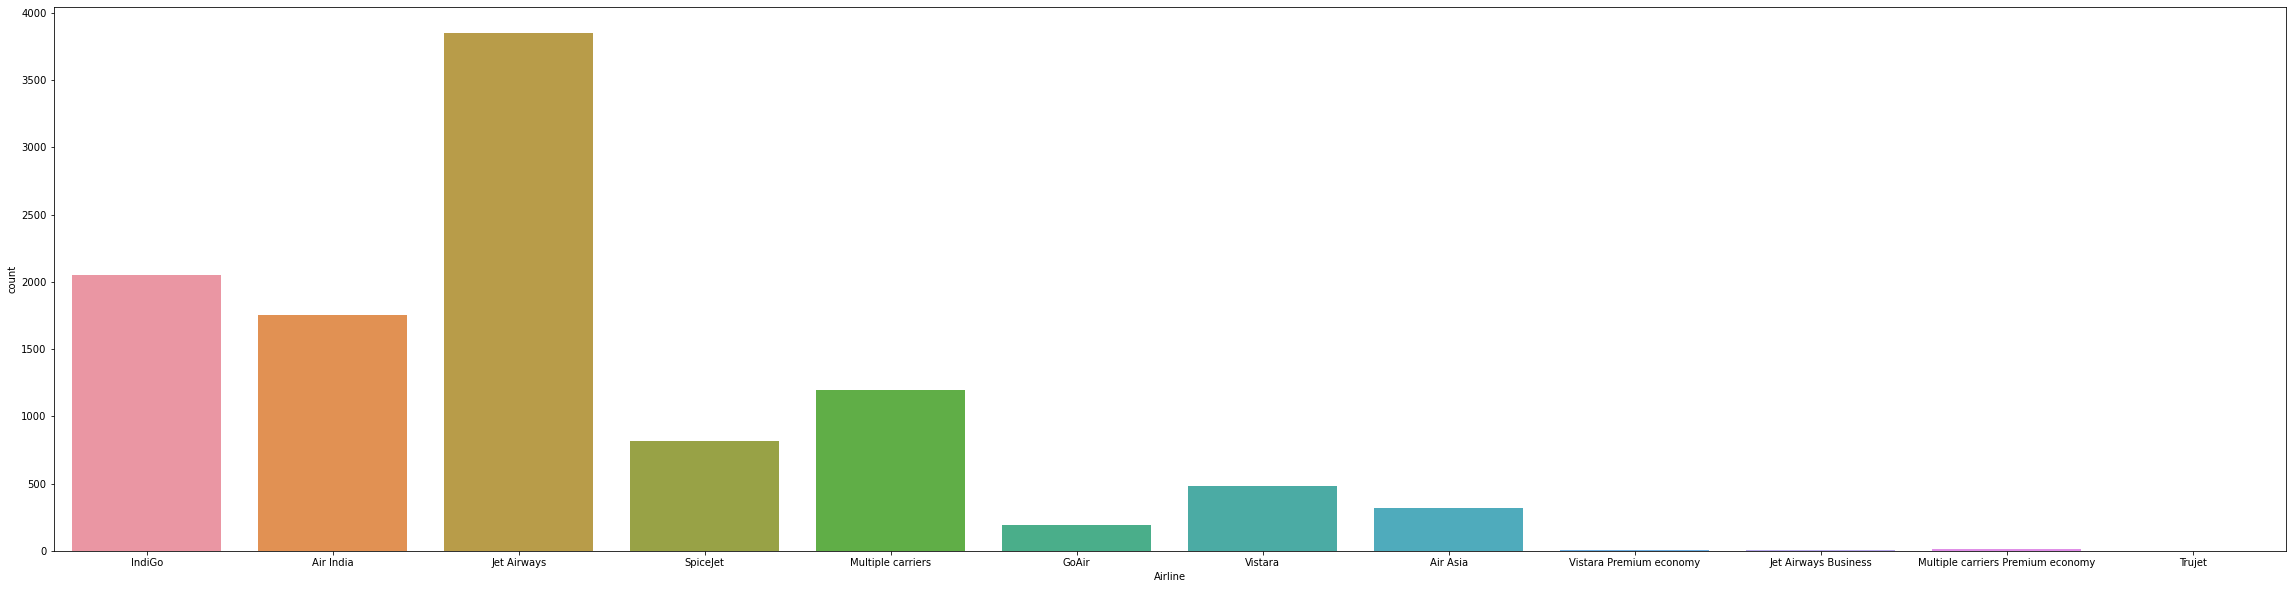

In [36]:
plt.figure(figsize=(40,10))
sns.countplot(train['Airline'])
plt.show()

jet aiways highest count of flight

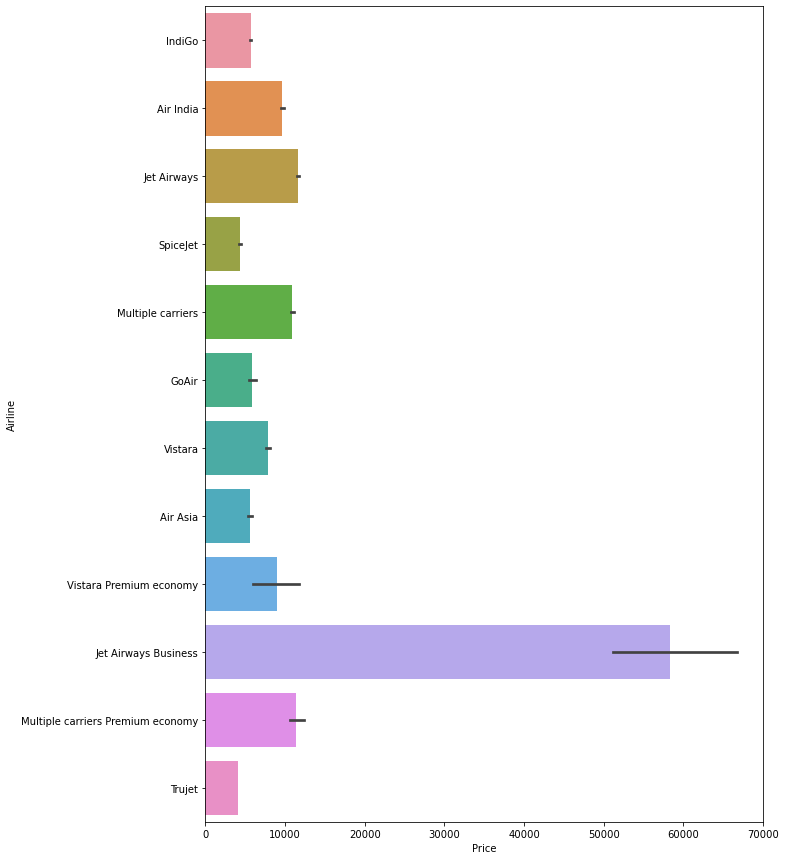

In [37]:
plt.figure(figsize=(10,15))
sns.barplot(x='Price',y='Airline',data=train)
plt.show()

jet airways business highest price

In [41]:
train['Airline']=train['Airline'].replace({'IndiGo':'1','Air India':'2','Jet Airways':'3','SpiceJet':'4','Multiple carriers':'5','GoAir':'6','Vistara':'7','Air Asia':'8','Vistara Premium economy':'9','Jet Airways Business':'10','Multiple carriers Premium economy':'11','Trujet':'12'})

train['Airline']=train['Airline'].astype('int64')

In [42]:
train.Airline.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

we give unique number all company

In [43]:
test.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [45]:
test['Airline']=test['Airline'].replace({'IndiGo':'1','Air India':'2','Jet Airways':'3','SpiceJet':'4','Multiple carriers':'5','GoAir':'6','Vistara':'7','Air Asia':'8','Vistara Premium economy':'9','Jet Airways Business':'10','Multiple carriers Premium economy':'11','Trujet':'12'})

test['Airline']=test['Airline'].astype('int64')

In [46]:
test.Airline.unique()

array([ 3,  1,  5,  8,  2,  7,  4,  9,  6, 11, 10], dtype=int64)

In [48]:
train.dtypes

Airline              int64
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_mi               int64
Arr_hr               int64
Arr_mi               int64
Duration_hours       int64
Duration_mins        int64
dtype: object

In [49]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [57]:
train['Total_Stops']=train['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop': 1,'3 stops':3,'4 stops':4})

#train['Total_Stops']=train['Total_Stops'].astypes('int64')

In [58]:
test['Total_Stops']=test['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

#test['Total_Stops']=train['Total_Stops'].astypes('int64')

In [59]:
train.head(20)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi,Duration_hours,Duration_mins
0,1,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,2,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,3,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,1,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,1,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45
5,4,Kolkata,Banglore,CCU → BLR,0,No info,3873,24,6,9,0,11,25,2,25
6,3,Banglore,New Delhi,BLR → BOM → DEL,1,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,3,Banglore,New Delhi,BLR → BOM → DEL,1,No info,22270,1,3,8,0,5,5,21,5
8,3,Banglore,New Delhi,BLR → BOM → DEL,1,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,5,Delhi,Cochin,DEL → BOM → COK,1,No info,8625,27,5,11,25,19,15,7,50


C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source', ylabel='count'>

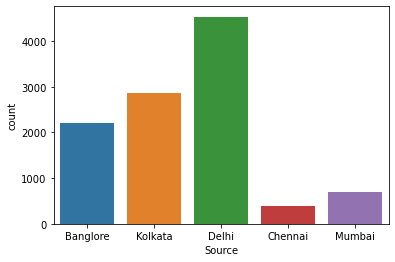

In [60]:
sns.countplot(train['Source'])

flight opreating in delhi more source higher number

C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

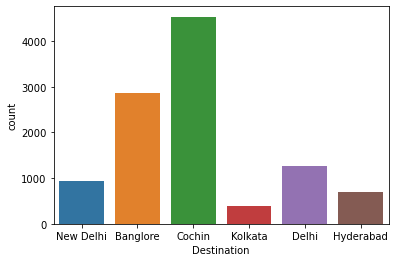

In [61]:
sns.countplot(train['Destination'])

flight for cochin destination are higher number

In [62]:
train.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [63]:
train.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [65]:
train['Source']=train['Source'].replace({'Banglore':1,'Kolkata':2,'Delhi': 3,'Chennai':4,'Mumbai':5})

#train['Total_Stops']=train['Total_Stops'].astypes('int64')
train['Destination']=train['Destination'].replace({'New Delhi':1,'Banglore':2,'Cochin': 3,'Kolkata':4,'Delhi':5,'Hyderabad':6})

<AxesSubplot:>

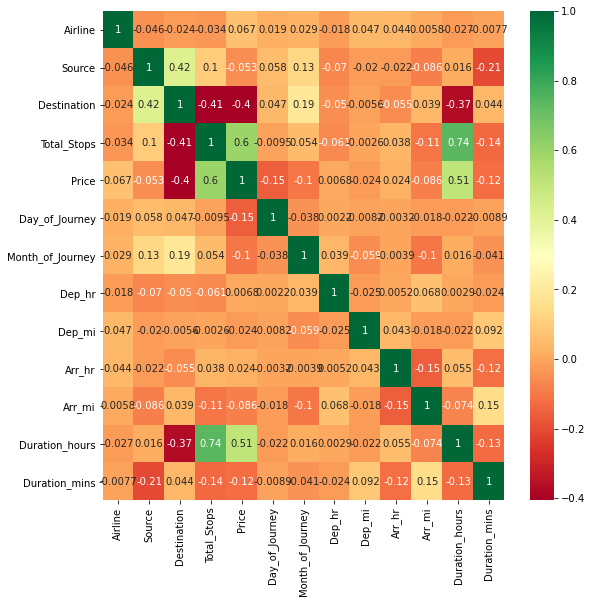

In [67]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(),annot=True, cmap='RdYlGn')

In [68]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi,Duration_hours,Duration_mins
0,1,1,1,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,2,2,2,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,3,3,3,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,1,2,2,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,1,1,1,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [69]:
test.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Day_of_Journey      0
Month_of_Journey    0
Dep_hr              0
Dep_mi              0
Arr_hr              0
Arr_mi              0
Duration_hours      0
Duration_mins       0
dtype: int64

# SPLIT DATA

In [70]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [71]:
X=train.drop(['Route','Additional_Info','Price'],axis=1)
y=train.Price.values

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=1)

In [73]:
print('Train:',(X_train.shape))
print('Test:',(X_test.shape,y_test.shape))

Train: (7477, 12)
Test: ((3205, 12), (3205,))


# DEFINE EVALUATION METRICS

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [80]:
def evaluation_metric(y_true,y_pred):

    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return 1-np.sqrt(np.square(np.log10(y_pred+1) -np.log10(y_true +1).mean())

SyntaxError: unexpected EOF while parsing (<ipython-input-80-6a45aa43f068>, line 4)

In [75]:
def evaluation_metric(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())

# Building model (Catboost)

In [84]:
from catboost import CatBoostRegressor

In [85]:
catboost=CatBoostRegressor()
catboost.fit(X,y)

Learning rate set to 0.059498
0:	learn: 4453.5492218	total: 172ms	remaining: 2m 51s
1:	learn: 4304.8753076	total: 180ms	remaining: 1m 29s
2:	learn: 4170.2857535	total: 201ms	remaining: 1m 6s
3:	learn: 4049.3085907	total: 228ms	remaining: 56.7s
4:	learn: 3933.0896818	total: 235ms	remaining: 46.8s
5:	learn: 3829.9428745	total: 242ms	remaining: 40s
6:	learn: 3715.9677628	total: 252ms	remaining: 35.8s
7:	learn: 3616.9815527	total: 261ms	remaining: 32.3s
8:	learn: 3538.9588878	total: 270ms	remaining: 29.7s
9:	learn: 3452.4289327	total: 280ms	remaining: 27.7s
10:	learn: 3367.2151457	total: 292ms	remaining: 26.2s
11:	learn: 3291.8721243	total: 303ms	remaining: 24.9s
12:	learn: 3233.5297839	total: 314ms	remaining: 23.8s
13:	learn: 3167.0365705	total: 321ms	remaining: 22.6s
14:	learn: 3108.4409421	total: 327ms	remaining: 21.5s
15:	learn: 3055.6457312	total: 338ms	remaining: 20.8s
16:	learn: 2997.8800513	total: 370ms	remaining: 21.4s
17:	learn: 2950.7516544	total: 456ms	remaining: 24.9s
18:	lear

In [87]:
plt.figure(figsize=(12,8))
feat_importances=pd.series(catboost.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

AttributeError: module 'pandas' has no attribute 'series'

<Figure size 864x576 with 0 Axes>

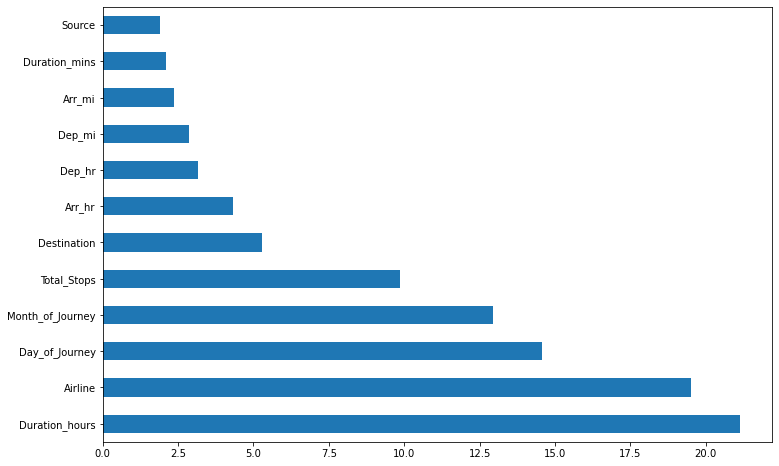

In [88]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(catboost.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [89]:
model=catboost.fit(X_train,y_train)

Learning rate set to 0.055837
0:	learn: 4536.8115925	total: 6.86ms	remaining: 6.85s
1:	learn: 4395.7159918	total: 14.3ms	remaining: 7.15s
2:	learn: 4272.6120682	total: 20.4ms	remaining: 6.78s
3:	learn: 4160.0933608	total: 26.9ms	remaining: 6.7s
4:	learn: 4044.0153527	total: 37.2ms	remaining: 7.41s
5:	learn: 3941.8857482	total: 45ms	remaining: 7.46s
6:	learn: 3843.0537913	total: 51.8ms	remaining: 7.34s
7:	learn: 3743.7345484	total: 61.9ms	remaining: 7.67s
8:	learn: 3665.4938789	total: 68.9ms	remaining: 7.59s
9:	learn: 3582.7777567	total: 78.1ms	remaining: 7.73s
10:	learn: 3496.5086209	total: 84.1ms	remaining: 7.56s
11:	learn: 3420.5139177	total: 91ms	remaining: 7.49s
12:	learn: 3346.3467485	total: 97.3ms	remaining: 7.39s
13:	learn: 3277.1431515	total: 103ms	remaining: 7.25s
14:	learn: 3216.4595408	total: 107ms	remaining: 7.02s
15:	learn: 3162.3974668	total: 111ms	remaining: 6.81s
16:	learn: 3115.1783080	total: 115ms	remaining: 6.63s
17:	learn: 3060.1542103	total: 119ms	remaining: 6.47s


In [90]:
y_preds=model.predict(X_test)
print('Total Predicted Price',len(y_preds))

Total Predicted Price 3205


In [91]:
price_preds= pd.DataFrame(y_test, columns=["Actual_Price"])
price_preds["Predicted_Price"]= y_preds
price_preds["Error"]= price_preds["Actual_Price"]- price_preds["Predicted_Price"]
price_preds.head()

,Actual_Price,Predicted_Price,Error
0,4441,4933.937814,-492.937814
1,14151,11860.164051,2290.835949
2,14151,12124.041702,2026.958298
3,13555,13134.459656,420.540344
4,6442,6396.900913,45.099087


In [93]:
print('Train Score',model.score(X_train,y_train))
print('Test Score',model.score(X_test,y_test))

Train Score 0.9117409726577775
Test Score 0.8333764037525011


In [95]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,y_preds))
print('MSE', metrics.mean_squared_error(y_test,y_preds))
print('RMSE',np.sqrt (metrics.mean_squared_error(y_test,y_preds)))

MAE 1202.7665332038143
MSE 3295315.7265256825
RMSE 1815.3004507589599


In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
from scipy.stats import zscore

In [98]:
print('Cofficient of Determination:',metrics.r2_score(y_test,y_preds))

Cofficient of Determination: 0.8333764037525011


In [99]:
print('Calculated value:',evaluation_metric(y_test,y_preds))

Calculated value: 0.923632513479103


# HYPER PARAMETER TUNING

# Grid search cv

In [100]:
params={'depth':[6,7,8,9,10],'eval_metric':['R2','RSME'],'learning_rate':[0.001,0.05,0.5,0.1]}

In [101]:
grid=GridSearchCV(estimator=model, param_grid=params,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)

C:\Users\CG-DTE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.53092633 0.82080069 0.78570024 0.81919792        nan        nan
        nan        nan 0.54608142 0.82178919 0.77892871 0.81796702
        nan        nan        nan        nan 0.5551662  0.82148505
 0.76717366 0.81169463        nan        nan        nan        nan
 0.56133578 0.81732565 0.77062302 0.80229844        nan        nan
        nan        nan 0.56274412 0.8086603  0.76498106 0.79483746
        nan        nan        nan        nan]
  warnings.warn(


0:	learn: 0.0577035	total: 7.54ms	remaining: 7.54s
1:	learn: 0.1071156	total: 12.6ms	remaining: 6.29s
2:	learn: 0.1568630	total: 20.2ms	remaining: 6.72s
3:	learn: 0.2005849	total: 26.2ms	remaining: 6.52s
4:	learn: 0.2414337	total: 32.1ms	remaining: 6.39s
5:	learn: 0.2786428	total: 36.1ms	remaining: 5.98s
6:	learn: 0.3153653	total: 41.2ms	remaining: 5.85s
7:	learn: 0.3461782	total: 46.7ms	remaining: 5.79s
8:	learn: 0.3722832	total: 52.1ms	remaining: 5.74s
9:	learn: 0.4002182	total: 57.5ms	remaining: 5.69s
10:	learn: 0.4267557	total: 62.7ms	remaining: 5.63s
11:	learn: 0.4522114	total: 69.3ms	remaining: 5.71s
12:	learn: 0.4760226	total: 74.3ms	remaining: 5.64s
13:	learn: 0.4968858	total: 79ms	remaining: 5.57s
14:	learn: 0.5145341	total: 85.7ms	remaining: 5.63s
15:	learn: 0.5322337	total: 91.1ms	remaining: 5.6s
16:	learn: 0.5493458	total: 96.9ms	remaining: 5.6s
17:	learn: 0.5635531	total: 102ms	remaining: 5.58s
18:	learn: 0.5747938	total: 108ms	remaining: 5.59s
19:	learn: 0.5878351	total: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000029DFDB55AF0>,
             n_jobs=-1,
             param_grid={'depth': [6, 7, 8, 9, 10],
                         'eval_metric': ['R2', 'RSME'],
                         'learning_rate': [0.001, 0.05, 0.5, 0.1]})

In [102]:
print('result from grid search')

print('\n  The best estimator across all searched params:\n',grid.best_estimator_)

print('\n  The best score across all searched params:\n',grid.best_score_)

print('\n  The best parameters across all searched params:\n',grid.best_params_)

result from grid search

  The best estimator across all searched params:

  The best score across all searched params:
 0.8217891854149632

  The best parameters across all searched params:
 {'depth': 7, 'eval_metric': 'R2', 'learning_rate': 0.05}


In [103]:
final_model=CatBoostRegressor(depth=7,eval_metric="R2",n_estimators=6000)
final_model.fit(X_train,y_train)

Learning rate set to 0.014306
0:	learn: 0.0168006	total: 8.43ms	remaining: 50.6s
1:	learn: 0.0321130	total: 16.8ms	remaining: 50.4s
2:	learn: 0.0484551	total: 40.1ms	remaining: 1m 20s
3:	learn: 0.0634708	total: 47.6ms	remaining: 1m 11s
4:	learn: 0.0788029	total: 55.1ms	remaining: 1m 6s
5:	learn: 0.0924463	total: 63.1ms	remaining: 1m 3s
6:	learn: 0.1068435	total: 68ms	remaining: 58.3s
7:	learn: 0.1211062	total: 76.3ms	remaining: 57.2s
8:	learn: 0.1334117	total: 85.9ms	remaining: 57.2s
9:	learn: 0.1472770	total: 96ms	remaining: 57.5s
10:	learn: 0.1611299	total: 107ms	remaining: 58.1s
11:	learn: 0.1758886	total: 118ms	remaining: 58.8s
12:	learn: 0.1888161	total: 127ms	remaining: 58.4s
13:	learn: 0.2014681	total: 134ms	remaining: 57.2s
14:	learn: 0.2119277	total: 142ms	remaining: 56.6s
15:	learn: 0.2240942	total: 149ms	remaining: 55.6s
16:	learn: 0.2372181	total: 159ms	remaining: 55.9s
17:	learn: 0.2482678	total: 169ms	remaining: 56s
18:	learn: 0.2588509	total: 177ms	remaining: 55.7s
19:	l

In [104]:
y_predictions=final_model.predict(X_test)
print('Total Predicted Prices:',len(y_predictions))

Total Predicted Prices: 3205


In [106]:
print('train score',final_model.score(X_train,y_train))
print ('test score'),final_model.score(X_test,y_test)

train score 0.9425589183548578
test score


(None, 0.8332797332218027)

In [107]:
test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))
print('MSE:', metrics.mean_squared_error(y_test, y_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
print('Coefficient of Determination:',metrics.r2_score(y_test,y_predictions))
print('Evaluation Metric value:', evaluation_metric(y_test, y_predictions))

MAE: 1158.6969938524587
MSE: 3297227.580112307
RMSE: 1815.826968659819
Coefficient of Determination: 0.8332797332218027
Evaluation Metric value: 0.9243268882568619


In [111]:
test.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi,Duration_hours,Duration_mins
0,3,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,1,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,3,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,5,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,8,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [113]:
train.head(50)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi,Duration_hours,Duration_mins
0,1,1,1,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,2,2,2,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,3,3,3,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,1,2,2,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,1,1,1,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45
5,4,2,2,CCU → BLR,0,No info,3873,24,6,9,0,11,25,2,25
6,3,1,1,BLR → BOM → DEL,1,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,3,1,1,BLR → BOM → DEL,1,No info,22270,1,3,8,0,5,5,21,5
8,3,1,1,BLR → BOM → DEL,1,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,5,3,3,DEL → BOM → COK,1,No info,8625,27,5,11,25,19,15,7,50


In [114]:
test['Source']=test['Source'].replace({'Banglore':1,'Kolkata':2,'Delhi': 3,'Chennai':4,'Mumbai':5})

#train['Total_Stops']=train['Total_Stops'].astypes('int64')
test['Destination']=test['Destination'].replace({'New Delhi':1,'Banglore':2,'Cochin': 3,'Kolkata':4,'Delhi':5,'Hyderabad':6})

In [115]:
test.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_mi,Arr_hr,Arr_mi,Duration_hours,Duration_mins
0,3,3,3,1,6,6,17,30,4,25,10,55
1,1,2,2,1,12,5,6,20,10,20,4,0
2,3,3,3,1,21,5,19,15,19,0,23,45
3,5,3,3,1,21,5,8,0,21,0,13,0
4,8,1,5,0,24,6,23,55,2,45,2,50


In [116]:
final_preds= final_model.predict(test)

In [117]:
price_df=pd.DataFrame(final_preds,columns=['Price'])
price_df.head()

,Price
0,11925.040127
1,4503.030699
2,13937.673161
3,10422.457103
4,3703.618761


In [118]:
price_df.to_csv('flight price prediction.csv')